In [1]:
# 清除已有的 GJEPA 文件夹（如果有）
!rm -rf /content/GJEPA

# 获取 GitHub Token 并 clone 到 /content/GJEPA 目录
from getpass import getpass
token = getpass('GitHub Token: ')
!git clone https://{token}@github.com/Echoo113/G-JEPA.git /content/GJEPA

# 进入目录
%cd /content/GJEPA




GitHub Token: ··········
Cloning into '/content/GJEPA'...
remote: Enumerating objects: 119, done.
remote: Counting objects: 100% (119/119), done.
remote: Compressing objects: 100% (91/91), done.
remote: Total 119 (delta 26), reused 113 (delta 20), pack-reused 0 (from 0)
Receiving objects: 100% (119/119), 39.03 MiB | 26.29 MiB/s, done.
Resolving deltas: 100% (26/26), done.
/content/GJEPA


In [2]:
!pip install -r requirements.txt


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 23.5/23.5 MB 93.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.2/9.2 MB 120.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.0/4.0 MB 97.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 154.2/154.2 kB 16.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 139.4/139.4 kB 14.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 466.9/466.9 kB 40.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 2.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 120.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 94.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 62.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

In [3]:
!ls


data		 graph	   main.ipynb  README.md	 setup.py
data_processing  jepa	   main.py     requirements.txt  train
forecast.py	 label.py  preprocess  results		 utils


In [15]:
import sys
import os

# 把项目根目录添加到 sys.path
project_root = os.getcwd()
if project_root not in sys.path:
    sys.path.insert(0, project_root)

print("✔ 已将项目根目录添加到 sys.path")
print("sys.path:", sys.path)
!python train/train_jepa.py



/usr/local/lib/python3.11/dist-packages/torch/utils/data/dataloader.py:624: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(


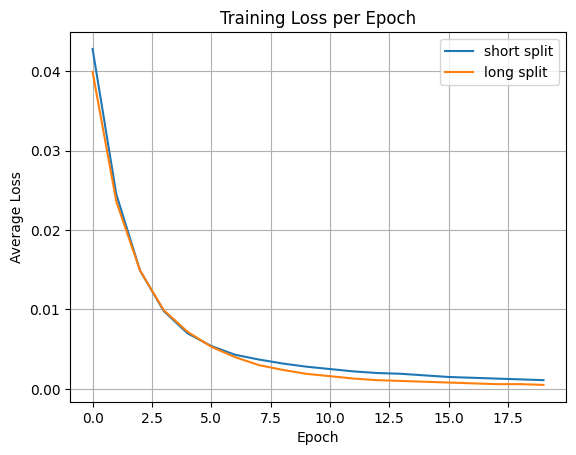

In [19]:
# 替代 __file__，使项目根路径正确
import builtins
builtins.__file__ = os.path.join(os.getcwd(), 'train/train_jepa.py')

# 捕捉输出
from io import StringIO
import sys, os, re
import matplotlib.pyplot as plt

old_stdout = sys.stdout
sys.stdout = mystdout = StringIO()

# 运行训练代码
exec(open("train/train_jepa.py").read())

# 恢复输出
sys.stdout = old_stdout



visualization


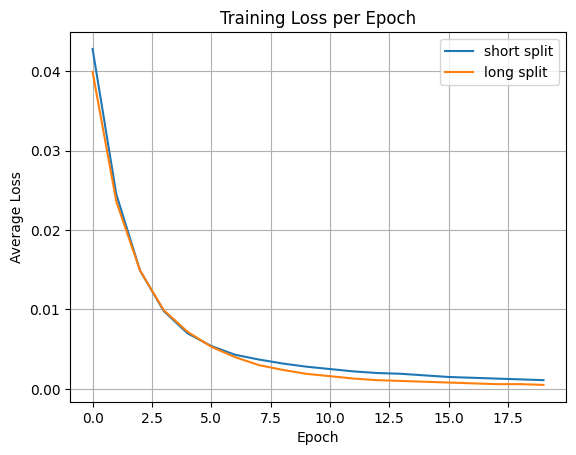

In [20]:

# 提取输出并可视化
log_output = mystdout.getvalue()
pattern = r"\[(\w+)\] Epoch \d+ — avg loss: ([0-9.]+)"
matches = re.findall(pattern, log_output)

split_losses = {}
for split, loss in matches:
    split_losses.setdefault(split, []).append(float(loss))

for split, losses in split_losses.items():
    plt.plot(losses, label=f"{split} split")

plt.title("Training Loss per Epoch")
plt.xlabel("Epoch")
plt.ylabel("Average Loss")
plt.grid(True)
plt.legend()
plt.show()
